# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


## Architecture

### LeNet Architecture 
![LeNet Architecture](lenet.png)
Source: Yan LeCun

---
## Step 0: Load The Data

In [394]:
# Load pickled data
import pickle

training_file = 'train_augmented.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))
print(train.keys())

dict_keys(['features', 'labels'])


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [395]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 44799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

13


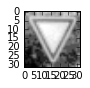

In [504]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

In [507]:
print("Training set count per class..")
class_count = [0]*43
for label in y_train:
    class_count[label] += 1

min_class = 0
max_class = 0
for class_id, count in enumerate(class_count):
    if count < class_count[min_class]:
        min_class = class_id
    if count > class_count[max_class]:
        max_class = class_id
    print("{} -> {}".format(class_id, count))
    
print("Minimum: {} -> {}".format(min_class, class_count[min_class]))
print("Maximum: {} -> {}".format(max_class, class_count[max_class]))

Training set count per class
0 -> 221
1 -> 2551
2 -> 2556
3 -> 1590
4 -> 2235
5 -> 2151
6 -> 446
7 -> 1641
8 -> 1598
9 -> 1695
10 -> 2355
11 -> 1513
12 -> 2439
13 -> 2477
14 -> 912
15 -> 707
16 -> 505
17 -> 1277
18 -> 1389
19 -> 225
20 -> 400
21 -> 334
22 -> 432
23 -> 563
24 -> 311
25 -> 1744
26 -> 714
27 -> 261
28 -> 634
29 -> 286
30 -> 482
31 -> 920
32 -> 282
33 -> 793
34 -> 450
35 -> 1404
36 -> 428
37 -> 238
38 -> 2353
39 -> 344
40 -> 381
41 -> 280
42 -> 282
Minimum: 0 -> 221
Maximum: 2 -> 2556


In [508]:
print("Validation set count per class..")
class_count = [0]*43
for label in y_valid:
    class_count[label] += 1

min_class = 0
max_class = 0
for class_id, count in enumerate(class_count):
    if count < class_count[min_class]:
        min_class = class_id
    if count > class_count[max_class]:
        max_class = class_id
    print("{} -> {}".format(class_id, count))
    
print("Minimum: {} -> {}".format(min_class, class_count[min_class]))
print("Maximum: {} -> {}".format(max_class, class_count[max_class]))

Validation set count per class..
0 -> 30
1 -> 240
2 -> 240
3 -> 150
4 -> 210
5 -> 210
6 -> 60
7 -> 150
8 -> 150
9 -> 150
10 -> 210
11 -> 150
12 -> 210
13 -> 240
14 -> 90
15 -> 90
16 -> 60
17 -> 120
18 -> 120
19 -> 30
20 -> 60
21 -> 60
22 -> 60
23 -> 60
24 -> 30
25 -> 150
26 -> 60
27 -> 30
28 -> 60
29 -> 30
30 -> 60
31 -> 90
32 -> 30
33 -> 90
34 -> 60
35 -> 120
36 -> 60
37 -> 30
38 -> 210
39 -> 30
40 -> 60
41 -> 30
42 -> 30
Minimum: 0 -> 30
Maximum: 1 -> 240


In [509]:
print("Test set count per class..")
class_count = [0]*43
for label in y_test:
    class_count[label] += 1

min_class = 0
max_class = 0
for class_id, count in enumerate(class_count):
    if count < class_count[min_class]:
        min_class = class_id
    if count > class_count[max_class]:
        max_class = class_id
    print("{} -> {}".format(class_id, count))
    
print("Minimum: {} -> {}".format(min_class, class_count[min_class]))
print("Maximum: {} -> {}".format(max_class, class_count[max_class]))

Test set count per class..
0 -> 60
1 -> 720
2 -> 750
3 -> 450
4 -> 660
5 -> 630
6 -> 150
7 -> 450
8 -> 450
9 -> 480
10 -> 660
11 -> 420
12 -> 690
13 -> 720
14 -> 270
15 -> 210
16 -> 150
17 -> 360
18 -> 390
19 -> 60
20 -> 90
21 -> 90
22 -> 120
23 -> 150
24 -> 90
25 -> 480
26 -> 180
27 -> 60
28 -> 150
29 -> 90
30 -> 150
31 -> 270
32 -> 60
33 -> 210
34 -> 120
35 -> 390
36 -> 120
37 -> 60
38 -> 690
39 -> 90
40 -> 90
41 -> 60
42 -> 90
Minimum: 0 -> 60
Maximum: 2 -> 750


## Data Augementation Visulization

Use data augementation to provide a larger training dataset to work with. The script to augment the data can be found in the augment_data.py file and is ran prior to the notebook data being loaded to provide an extra 10000 images to train the dataset with. 

In [397]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import random

In [398]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

In [399]:
def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
      img = augment_brightness_camera_images(img)

    return img

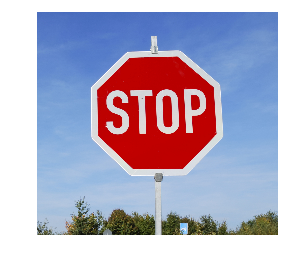

In [400]:
# Show a sample image
image = mpimg.imread('stopsign.jpg')
plt.imshow(image);
plt.axis('off');

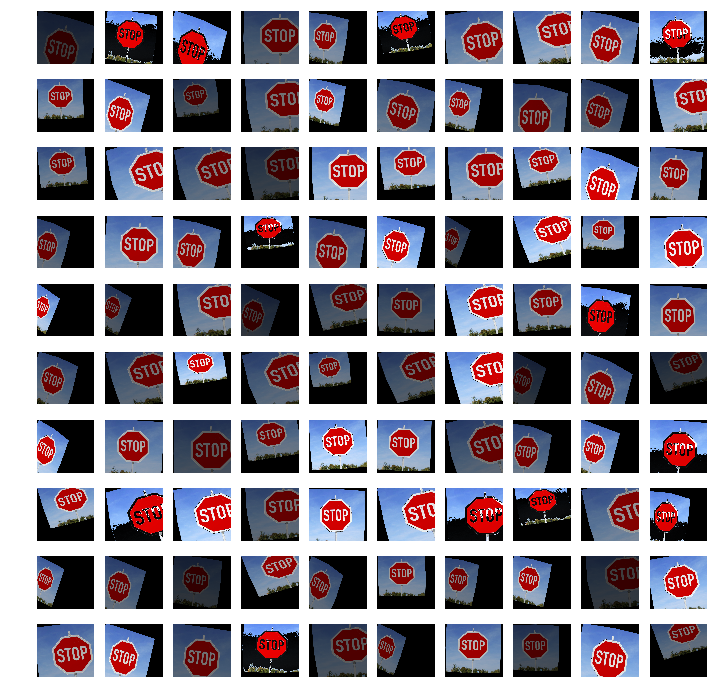

In [401]:
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image,20,10,5,brightness=1)

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [402]:

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


In [403]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

### Convert to grayscale

Convert to grayscale and apply histogram equalization

In [404]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_test])
X_valid = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_valid])

from numpy import newaxis
# apply histogram equalization
X_train = np.array([cv2.equalizeHist(image) for image in X_train])
X_test = np.array([cv2.equalizeHist(image) for image in X_test])
X_valid = np.array([cv2.equalizeHist(image) for image in X_valid])

X_train = X_train[..., newaxis]
X_test = X_test[..., newaxis]
X_valid = X_valid[..., newaxis]
print('After shaping:', X_train.shape)

After shaping: (44799, 32, 32, 1)


9


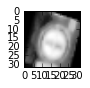

In [405]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

### Normalize image data

In [406]:
def normalize(x):
    # Normalize to keep all image array values within the range -1 to 1
    x = x.astype('float32')
    return (x-128.)/128.
X_train = normalize(X_train)
X_test = normalize(X_test)
X_valid = normalize(X_valid)

### Model Architecture

In [407]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Apply Dropout
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Apply Dropout
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Apply Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84,n_classes), mean = mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Train network to classify Traffic Sign Data

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [408]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

## Training pipeline

Create a training pipeline that uses model to classify Traffic Sign data

In [476]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation

Evaluate how well the loss and accuracy of the model for the dataset

In [477]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the model

Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [478]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.772

EPOCH 2 ...
Validation Accuracy = 0.843

EPOCH 3 ...
Validation Accuracy = 0.884

EPOCH 4 ...
Validation Accuracy = 0.905

EPOCH 5 ...
Validation Accuracy = 0.930

EPOCH 6 ...
Validation Accuracy = 0.931

EPOCH 7 ...
Validation Accuracy = 0.943

EPOCH 8 ...
Validation Accuracy = 0.947

EPOCH 9 ...
Validation Accuracy = 0.952

EPOCH 10 ...
Validation Accuracy = 0.950

EPOCH 11 ...
Validation Accuracy = 0.944

EPOCH 12 ...
Validation Accuracy = 0.946

EPOCH 13 ...
Validation Accuracy = 0.953

EPOCH 14 ...
Validation Accuracy = 0.948

EPOCH 15 ...
Validation Accuracy = 0.954

EPOCH 16 ...
Validation Accuracy = 0.963

EPOCH 17 ...
Validation Accuracy = 0.958

EPOCH 18 ...
Validation Accuracy = 0.963

EPOCH 19 ...
Validation Accuracy = 0.965

EPOCH 20 ...
Validation Accuracy = 0.960

Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [479]:
from PIL import Image
import os

image_files  = ['samples/' + image_file for image_file in os.listdir('samples')]
images = []
sign_types = []
for image_file in image_files:
    end_index = image_file.index('.')
    sign_type = int(image_file[end_index-2:end_index])
    print(sign_type)
    sign_types.append(sign_type)
    image = Image.open(image_file)
    image = image.convert('RGB')
    image = image.resize((32, 32), Image.ANTIALIAS)
    image = np.array(list(image.getdata()), dtype='uint8')
    image = np.reshape(image, (32, 32, 3))

    images.append(image)
images = np.array(images, dtype='uint8')
print(images.shape)

34
24
30
18
33
(5, 32, 32, 3)


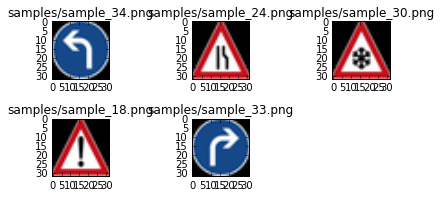

In [480]:
# Visualize sample
for i, image in enumerate(images):
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(image_files[i])

plt.tight_layout()
plt.show()

### Predict the Sign Type for Each Image

In [482]:
# Load signnames.csv to map label number to sign string
label_map = {}
with open('signnames.csv', 'r') as f:
    first_line = True
    for line in f:
        # Ignore first line
        if first_line:
            first_line = False
            continue

        # Populate label_map
        label_int, label_string = line.split(',')
        label_int = int(label_int)

        label_map[label_int] = label_string

In [483]:
print(label_map)

{0: 'Speed limit (20km/h)\n', 1: 'Speed limit (30km/h)\n', 2: 'Speed limit (50km/h)\n', 3: 'Speed limit (60km/h)\n', 4: 'Speed limit (70km/h)\n', 5: 'Speed limit (80km/h)\n', 6: 'End of speed limit (80km/h)\n', 7: 'Speed limit (100km/h)\n', 8: 'Speed limit (120km/h)\n', 9: 'No passing\n', 10: 'No passing for vehicles over 3.5 metric tons\n', 11: 'Right-of-way at the next intersection\n', 12: 'Priority road\n', 13: 'Yield\n', 14: 'Stop\n', 15: 'No vehicles\n', 16: 'Vehicles over 3.5 metric tons prohibited\n', 17: 'No entry\n', 18: 'General caution\n', 19: 'Dangerous curve to the left\n', 20: 'Dangerous curve to the right\n', 21: 'Double curve\n', 22: 'Bumpy road\n', 23: 'Slippery road\n', 24: 'Road narrows on the right\n', 25: 'Road work\n', 26: 'Traffic signals\n', 27: 'Pedestrians\n', 28: 'Children crossing\n', 29: 'Bicycles crossing\n', 30: 'Beware of ice/snow\n', 31: 'Wild animals crossing\n', 32: 'End of all speed and passing limits\n', 33: 'Turn right ahead\n', 34: 'Turn left ahea

In [484]:
# Convert to grayscale
images = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in images])

# apply histogram equalization
images = np.array([cv2.equalizeHist(image) for image in images])

images = images[..., newaxis]

print('After shaping:', images.shape)

After shaping: (5, 32, 32, 1)


In [485]:
# normalize image
images = normalize(images)

In [488]:
predictions = tf.argmax(logits, 1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Load trained weights
    saver = tf.train.Saver()
    saver.restore(sess, './lenet')
    
    lgits, predictions = sess.run([logits, predictions], feed_dict={x: images, keep_prob: 1.})
    
for prediction in predictions:
#     print(prediction)
    print('{} -> {}'.format(prediction, label_map[prediction]))

38 -> Keep right

18 -> General caution

28 -> Children crossing

18 -> General caution

33 -> Turn right ahead



### Analyze Performance

In [487]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
count = 0
for i in range(5):
    if sign_types[i] == predictions[i]:
        count += 1
print('{}%'.format(count*100/5))

40.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [490]:
with tf.Session() as sess:
    m_logits = tf.placeholder('float', [None, 43])
    
    softmax = tf.nn.softmax(m_logits)
    top_k_val, top_k_idx = tf.nn.top_k(softmax, k=5)
    
    top_k_vals, top_k_idxs = sess.run([top_k_val, top_k_idx], feed_dict={m_logits: lgits})

In [491]:
def display_pred_certainty(image, top_k_val, top_k_idx):
    print('Top 5 predictions for the following image (prediction: probability)')
    # Convert top k indices into strings
    top_k_pred = [label_map[idx] for idx in top_k_idx]
    
    # Show the image for reference
    plt.imshow(image)
    plt.show()
    
    for i in range(5):
        print('%s: %.2f%%' % (top_k_pred[i].replace('\n', ''), top_k_val[i] * 100))

In [492]:
# Re-read sample data

image_files  = ['samples/' + image_file for image_file in os.listdir('samples')]
images = []
sign_types = []
for image_file in image_files:
    end_index = image_file.index('.')
    sign_type = int(image_file[end_index-2:end_index])
    print(sign_type)
    sign_types.append(sign_type)
    image = Image.open(image_file)
    image = image.convert('RGB')
    image = image.resize((32, 32), Image.ANTIALIAS)
    image = np.array(list(image.getdata()), dtype='uint8')
    image = np.reshape(image, (32, 32, 3))

    images.append(image)
images = np.array(images, dtype='uint8')

34
24
30
18
33


Top 5 predictions for the following image (prediction: probability)


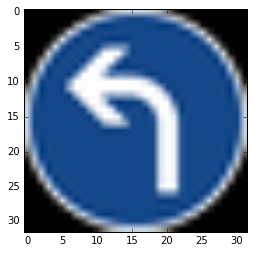

Keep right: 40.25%
Turn left ahead: 19.94%
Speed limit (70km/h): 7.23%
Roundabout mandatory: 6.34%
Speed limit (30km/h): 5.42%


In [493]:
i = 0
display_pred_certainty(images[i], top_k_vals[i], top_k_idxs[i])

Top 5 predictions for the following image (prediction: probability)


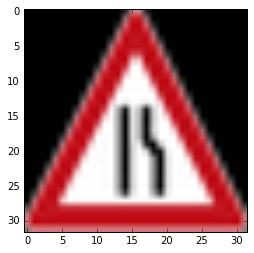

General caution: 82.81%
Road work: 6.04%
Traffic signals: 3.69%
Road narrows on the right: 3.28%
Right-of-way at the next intersection: 2.38%


In [494]:
i = 1
display_pred_certainty(images[i], top_k_vals[i], top_k_idxs[i])

Top 5 predictions for the following image (prediction: probability)


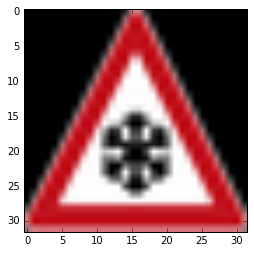

Children crossing: 75.86%
Beware of ice/snow: 8.13%
Dangerous curve to the right: 6.63%
Right-of-way at the next intersection: 3.41%
Road work: 2.56%


In [495]:
i = 2
display_pred_certainty(images[i], top_k_vals[i], top_k_idxs[i])

Top 5 predictions for the following image (prediction: probability)


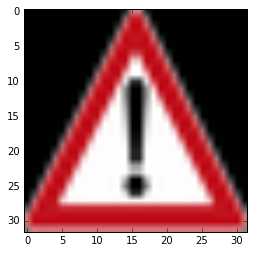

General caution: 99.91%
Pedestrians: 0.04%
Traffic signals: 0.03%
Road narrows on the right: 0.01%
Children crossing: 0.00%


In [496]:
i = 3
display_pred_certainty(images[i], top_k_vals[i], top_k_idxs[i])

Top 5 predictions for the following image (prediction: probability)


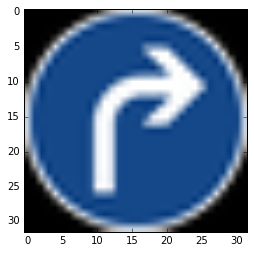

Turn right ahead: 36.96%
Ahead only: 20.44%
Speed limit (30km/h): 15.54%
Roundabout mandatory: 4.91%
Speed limit (100km/h): 4.39%


In [497]:
i = 
display_pred_certainty(images[i], top_k_vals[i], top_k_idxs[i])

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [499]:
### TODO: Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [501]:
# outputFeatureMap(images[0], conv2)